<a href="https://colab.research.google.com/github/dhruvaes/Lead-Scoring-Case-Study/blob/main/Lead-Scoring-Case-Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a id="32"> DS_C47</a>  
## LEAD SCORING CASE STUDY
## NAME- <a id='32' >KARAN GUPTA</a> | <a id='10' >DHRUVA E SESHASAYEE</a> | <a id='10' >VIJAYRAJ K POOJARY</a>

### EMAIL ID.- `karangupta411@gmail.com` | `sesha.art@gmail.com` | `vijayraj_kp@outlook.com`

## <a id="32"> Step 0: Importing all nessecary Libraries </a>


In [6]:
#import the nessecary packages into the notebook.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Setting the display options rows and max columns:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)

pd.options.display.float_format = '{:.4f}'.format

In [7]:
# importing statistical packages
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from itertools import product
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score
!pip install prince
import plotly.express as px


from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#warnings.
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## <a id="32"> Step 1: Reading & Understanding the Data </a>

In [9]:
DF = pd.read_csv("Leads.csv")


**` Finding the shape of data i.e. ROWS and COLUMNS we need to run EDA with:`**

In [10]:
def get_shape(df):
    rows, cols = df.shape
    print("We have",rows,"rows and",cols,"columns to Run EDA anylyse")
    
# bifurcation of numerical and categorical attributes
def bifurcate_features(df):
    numerical_var = df.select_dtypes(include=[np.number])
    categorical_var = df.select_dtypes(include=[np.object,'category'])
    return numerical_var, categorical_var

**` Data Understanding :`**

In [11]:
get_shape(DF)
numeri_vars,categ_vars=bifurcate_features(DF) 
print('\n')
print('We have',numeri_vars.shape[1], "numerical columns Pre-cleaning")
print('We have',categ_vars.shape[1], "categorical_ columns Pre-cleaning")

We have 9240 rows and 37 columns to Run EDA anylyse


We have 7 numerical columns Pre-cleaning
We have 30 categorical_ columns Pre-cleaning


In [12]:
drop_col=['Prospect ID']
DF.drop(drop_col, axis=1,inplace=True)
categ_col= [col for col in categ_vars.columns if col not in drop_col]
numeri_col=list(numeri_vars.columns)


In [13]:
DF[numeri_col].describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.0000,9240.0000,9103.0000,9240.0000,9103.0000,5022.0000,5022.0000
mean,617188.4356,0.3854,3.4452,487.6983,2.3628,14.3063,16.3449
std,23405.9957,0.4867,4.8549,548.0215,2.1614,1.3867,1.8114
min,579533.0000,0.0000,0.0000,0.0000,0.0000,7.0000,11.0000
25%,596484.5000,0.0000,1.0000,12.0000,1.0000,14.0000,15.0000
50%,615479.0000,0.0000,3.0000,248.0000,2.0000,14.0000,16.0000
75%,637387.2500,1.0000,5.0000,936.0000,3.0000,15.0000,18.0000
max,660737.0000,1.0000,251.0000,2272.0000,55.0000,18.0000,20.0000


In [14]:
DF[categ_col].head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified


### `**Checking for Data Imbalance**`

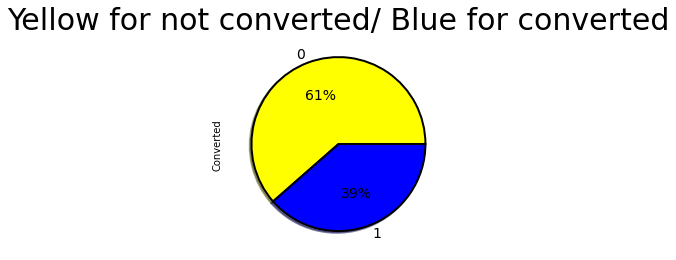

Data is not highly imbalanced as 61% applicants did not get converted but 39% did !!


In [15]:
# checking for data imbalance in targer column of  data which is "CONVERTED"

DF["Converted"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["yellow","blue"],textprops={'fontsize': 14},
                                      wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)


plt.title("Yellow for not converted/ Blue for converted",fontsize = 30)
plt.show()
print("Data is not highly imbalanced as 61% applicants did not get converted but 39% did !!")


## <a id="32"> Step 2: Data Preprocessing </a>


### **`Removing Duplicates`**

In [16]:
def find_duplicates(df):
    rows_before,b=df.shape
    df.drop_duplicates(inplace=True)
    rows_after,columns_after=df.shape
    if rows_after<rows_before:
        print('NOTE >> ',rows_before-rows_after,'Duplicate Rows Removed')
    else:
        print('NOTE >> Data does not have Duplicates')
find_duplicates(DF)

NOTE >> Data does not have Duplicates


### **` Checking variable inconsistancy in data :`**

In [17]:
#double check for differnt data type presnt in the columns
dic_vartype={}  
for i in DF.columns:
    unique_dtypes=set()
    for x in DF[i]:
        unique_dtypes.add(type(x))
    dic_vartype[i]=unique_dtypes
          
dic_vartype
    
# there is data discripancy due to null values

{'Lead Number': {int},
 'Lead Origin': {str},
 'Lead Source': {float, str},
 'Do Not Email': {str},
 'Do Not Call': {str},
 'Converted': {int},
 'TotalVisits': {float},
 'Total Time Spent on Website': {int},
 'Page Views Per Visit': {float},
 'Last Activity': {float, str},
 'Country': {float, str},
 'Specialization': {float, str},
 'How did you hear about X Education': {float, str},
 'What is your current occupation': {float, str},
 'What matters most to you in choosing a course': {float, str},
 'Search': {str},
 'Magazine': {str},
 'Newspaper Article': {str},
 'X Education Forums': {str},
 'Newspaper': {str},
 'Digital Advertisement': {str},
 'Through Recommendations': {str},
 'Receive More Updates About Our Courses': {str},
 'Tags': {float, str},
 'Lead Quality': {float, str},
 'Update me on Supply Chain Content': {str},
 'Get updates on DM Content': {str},
 'Lead Profile': {float, str},
 'City': {float, str},
 'Asymmetrique Activity Index': {float, str},
 'Asymmetrique Profile Index

In [18]:
print((DF.isnull().sum()/DF.shape[0]*100).sort_values(ascending = False))

Lead Quality                                    51.5909
Asymmetrique Activity Index                     45.6494
Asymmetrique Profile Index                      45.6494
Asymmetrique Profile Score                      45.6494
Asymmetrique Activity Score                     45.6494
Tags                                            36.2879
Lead Profile                                    29.3182
What matters most to you in choosing a course   29.3182
What is your current occupation                 29.1126
Country                                         26.6342
How did you hear about X Education              23.8853
Specialization                                  15.5628
City                                            15.3680
Page Views Per Visit                             1.4827
TotalVisits                                      1.4827
Last Activity                                    1.1147
Lead Source                                      0.3896
I agree to pay the amount through cheque        

### **`Numerical Features Analysis:`**


In [19]:
DF[numeri_col]

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,0,0.0000,0,0.0000,15.0000,15.0000
1,660728,0,5.0000,674,2.5000,15.0000,15.0000
2,660727,1,2.0000,1532,2.0000,14.0000,20.0000
3,660719,0,1.0000,305,1.0000,13.0000,17.0000
4,660681,1,2.0000,1428,1.0000,15.0000,18.0000
...,...,...,...,...,...,...,...
9235,579564,1,8.0000,1845,2.6700,15.0000,17.0000
9236,579546,0,2.0000,238,2.0000,14.0000,19.0000
9237,579545,0,2.0000,199,2.0000,13.0000,20.0000
9238,579538,1,3.0000,499,3.0000,15.0000,16.0000


In [20]:

(DF[numeri_col].isnull().sum()/DF[numeri_col].shape[0]*100).sort_values(ascending = False)

Asymmetrique Activity Score   45.6494
Asymmetrique Profile Score    45.6494
TotalVisits                    1.4827
Page Views Per Visit           1.4827
Lead Number                    0.0000
Converted                      0.0000
Total Time Spent on Website    0.0000
dtype: float64

#### Variables having more than 45% null values is not good for model building and imputing or interpolate the data will not be an ideal way in case if there are many null values available in the data. It's better to exclude that column to avoid randomness & bias in our model.

In [21]:
drop_cols=['Asymmetrique Activity Score', 'Asymmetrique Profile Score']
DF = DF.drop(drop_cols, axis = 1)
numeri_col=[col for col in numeri_col if col not in drop_cols]


In [22]:
se_median = SimpleImputer(missing_values = np.nan, strategy='median')
DF[['TotalVisits', 'Page Views Per Visit']] = se_median.fit_transform(DF[['TotalVisits', 'Page Views Per Visit']])


### **` Visualising Numeric Variables:`**

In [23]:
def univariate(dataset,attribute):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(12,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(dataset[attribute],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =dataset, x=attribute,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =dataset, x=attribute,ax=ax[2],orient='v')
        plt.show()

##### Analysis on Column: TotalVisits

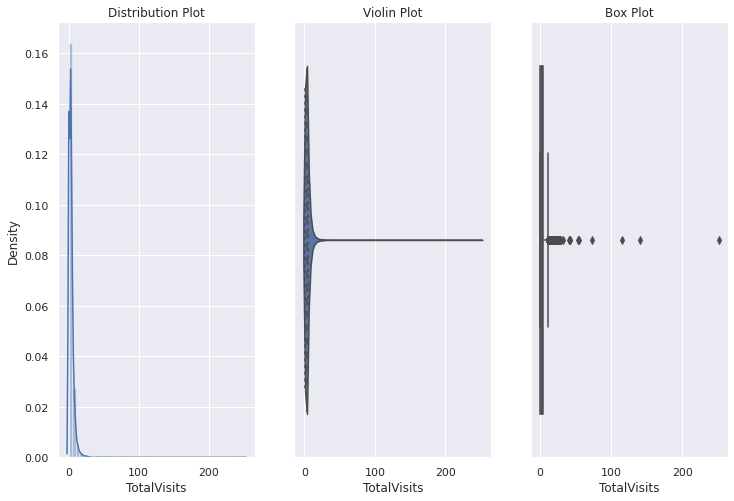

In [24]:
#Lets carry out Univariate analysis on TotalVisits
univariate(dataset=DF,attribute='TotalVisits')


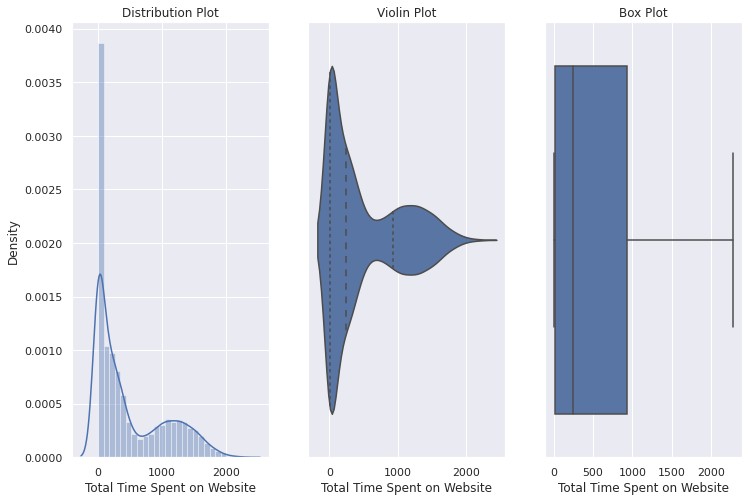

In [25]:
univariate(dataset=DF,attribute='Total Time Spent on Website')


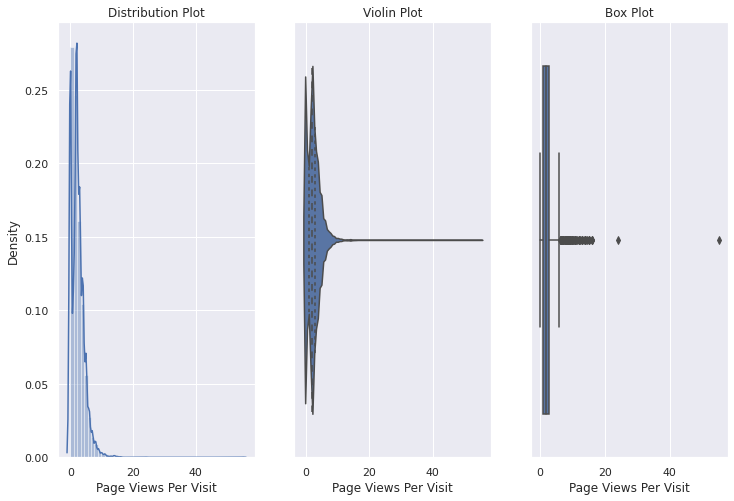

In [26]:
univariate(dataset=DF,attribute='Page Views Per Visit')


### **`Categorical Features Analysis  `**


In [27]:
for i in categ_col:
    print(DF[i].value_counts())
    print("--"*20)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
----------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
----------------------------------------
No     9238
Yes       2
Name: Do Not Call, dtype: 

In some of the response columns the unatempted options are marked as **"select"** which are as good **unknown or Nulls** so we change it to **"UNKNOWN"**

In [28]:
inconsistent_vars=['Specialization','How did you hear about X Education','Lead Profile','City']
for i in inconsistent_vars:
    DF[i].replace(to_replace='Select', value='UNKNOWN', inplace=True)
   
    

In [29]:
DF[categ_col].head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,NaN,UNKNOWN,UNKNOWN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,UNKNOWN,UNKNOWN,02.Medium,02.Medium,No,No,Modified
1,API,Organic Search,No,No,Email Opened,India,UNKNOWN,UNKNOWN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,UNKNOWN,UNKNOWN,02.Medium,02.Medium,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,UNKNOWN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,UNKNOWN,Mumbai,02.Medium,01.High,No,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,India,UNKNOWN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,UNKNOWN,Mumbai,02.Medium,01.High,No,No,Modified


In [30]:
print((DF[categ_col].isna().sum()/DF[categ_col].shape[0]*100).sort_values(ascending = False))

Lead Quality                                    51.5909
Asymmetrique Activity Index                     45.6494
Asymmetrique Profile Index                      45.6494
Tags                                            36.2879
Lead Profile                                    29.3182
What matters most to you in choosing a course   29.3182
What is your current occupation                 29.1126
Country                                         26.6342
How did you hear about X Education              23.8853
Specialization                                  15.5628
City                                            15.3680
Last Activity                                    1.1147
Lead Source                                      0.3896
I agree to pay the amount through cheque         0.0000
A free copy of Mastering The Interview           0.0000
Get updates on DM Content                        0.0000
Update me on Supply Chain Content                0.0000
Lead Origin                                     

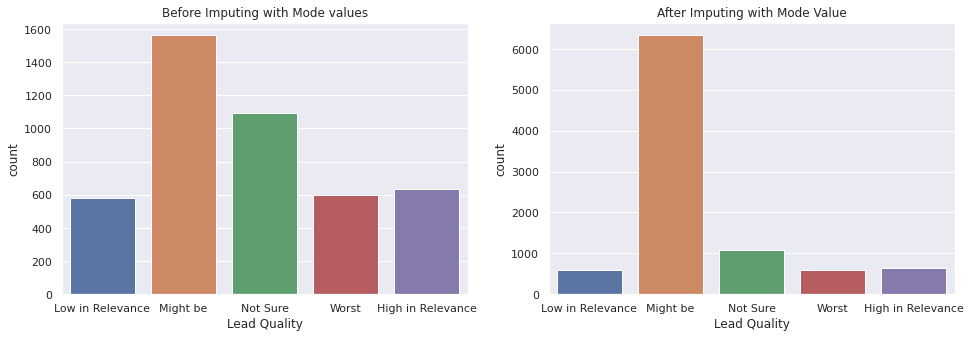

In [31]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Mode values")
sns.countplot(data = DF[categ_col], x = 'Lead Quality')
plt.subplot(122)
plt.title("After Imputing with Mode Value")
sns.countplot(data = DF[categ_col].fillna(value = DF['Lead Quality'].mode()[0]), x = 'Lead Quality')
plt.show()

The outcome of **Imputing method** for **NaN values** in Lead_Quality variable with **Most Frequent value| Mode value** is not sucinct as it leads to skew  more than 50% data in one feature direction i.e.**Maybe** and create an imbalance class.




In [32]:
null_col1=DF[categ_col].isnull().sum()
null_col1=null_col1[null_col1.values>(0.0*len(DF))]
print((null_col1/len(DF)).sort_values(ascending=False))

Lead Quality                                    0.5159
Asymmetrique Activity Index                     0.4565
Asymmetrique Profile Index                      0.4565
Tags                                            0.3629
What matters most to you in choosing a course   0.2932
Lead Profile                                    0.2932
What is your current occupation                 0.2911
Country                                         0.2663
How did you hear about X Education              0.2389
Specialization                                  0.1556
City                                            0.1537
Last Activity                                   0.0111
Lead Source                                     0.0039
dtype: float64


Let's try to understand why there are Null Values Present into our data so based on that we will be able to identify which columns we can negate from our data and which columns we can keep for the imputation process.

In [33]:
DF[(DF['Lead Source'].isnull())][['Lead Origin', 'Lead Source', 'Last Activity', 'City', 'Specialization', 'Country', 'Tags']]

,Lead Origin,Lead Source,Last Activity,City,Specialization,Country,Tags
836,Lead Add Form,NaN,Email Bounced,UNKNOWN,UNKNOWN,NaN,NaN
1569,Lead Add Form,NaN,SMS Sent,UNKNOWN,UNKNOWN,NaN,Will revert after reading the email
1746,Lead Add Form,NaN,SMS Sent,UNKNOWN,UNKNOWN,NaN,NaN
2020,Lead Add Form,NaN,SMS Sent,UNKNOWN,UNKNOWN,NaN,NaN
2025,Lead Add Form,NaN,SMS Sent,UNKNOWN,UNKNOWN,NaN,Will revert after reading the email
2152,Lead Add Form,NaN,SMS Sent,UNKNOWN,UNKNOWN,NaN,NaN
2346,Lead Add Form,NaN,SMS Sent,UNKNOWN,UNKNOWN,NaN,Will revert after reading the email
2544,Lead Import,NaN,Email Opened,UNKNOWN,UNKNOWN,NaN,number not provided
2601,Quick Add Form,NaN,Email Bounced,Other Metro Cities,E-COMMERCE,NaN,NaN
2676,Lead Add Form,NaN,SMS Sent,Other Cities of Maharashtra,Human Resource Management,NaN,Will revert after reading the email


The conclusion while inspecting the Null Values in 'Lead Source' is that the form fields which are available to the users are not marked mandatory mostly left unattended.

The Lead Source which are coming as Null are those who came from the 'Lead Add Form', 'Quick Add Form' & 'Landing Page Submission'. Also, if we take a look at the associated 'Tags' those give us bit of an idea that the person might not be interested or busy to attend or revert to any communication.



In [34]:
lead_qual_null=DF[DF['Lead Quality'].isna()]
num_rows=len(lead_qual_null)
other_nulls=lead_qual_null.isna().sum()/num_rows*100
print(other_nulls[other_nulls.values>0].sort_values(ascending=False))

Lead Quality                                    100.0000
Tags                                             69.7713
What matters most to you in choosing a course    56.8282
Lead Profile                                     56.8282
What is your current occupation                  56.4296
How did you hear about X Education               46.2975
Asymmetrique Activity Index                      46.0248
Asymmetrique Profile Index                       46.0248
Country                                          31.1307
Specialization                                   30.1657
City                                             29.7881
Last Activity                                     0.5244
Lead Source                                       0.2937
dtype: float64


In [35]:
drop_col=["Lead Quality", "Asymmetrique Profile Index", "Asymmetrique Activity Index"]
DF.drop(drop_col, axis = 1, inplace=True)
categ_col=[i for i in categ_col if i not in drop_col]


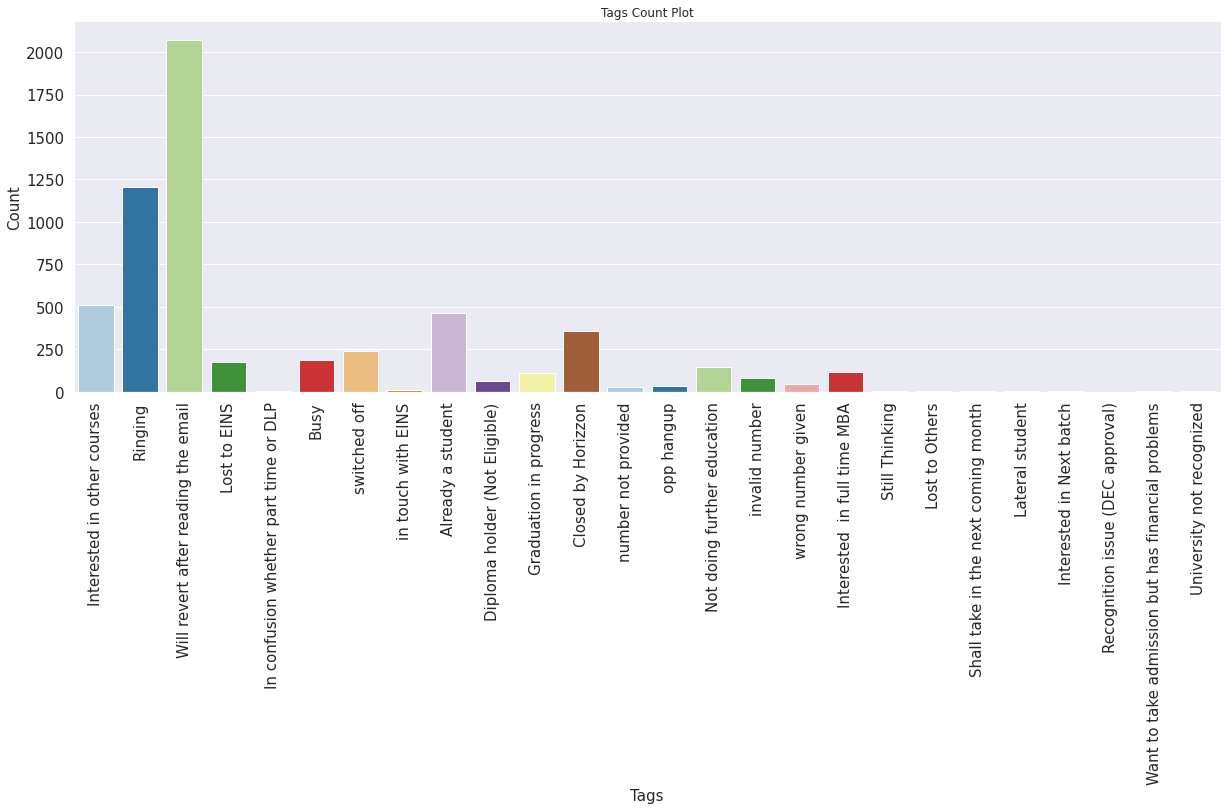

In [36]:
sns.catplot(data = DF[categ_col], x = 'Tags', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'Tags Count Plot')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=15)
plt.xlabel("Tags", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

**Null values** that are present in the **Tags** column are **36%** but apart from that we can see here is that most people have reply with **Will revert after reading the email** & few of them did not picked up the call and their call went unanswered.



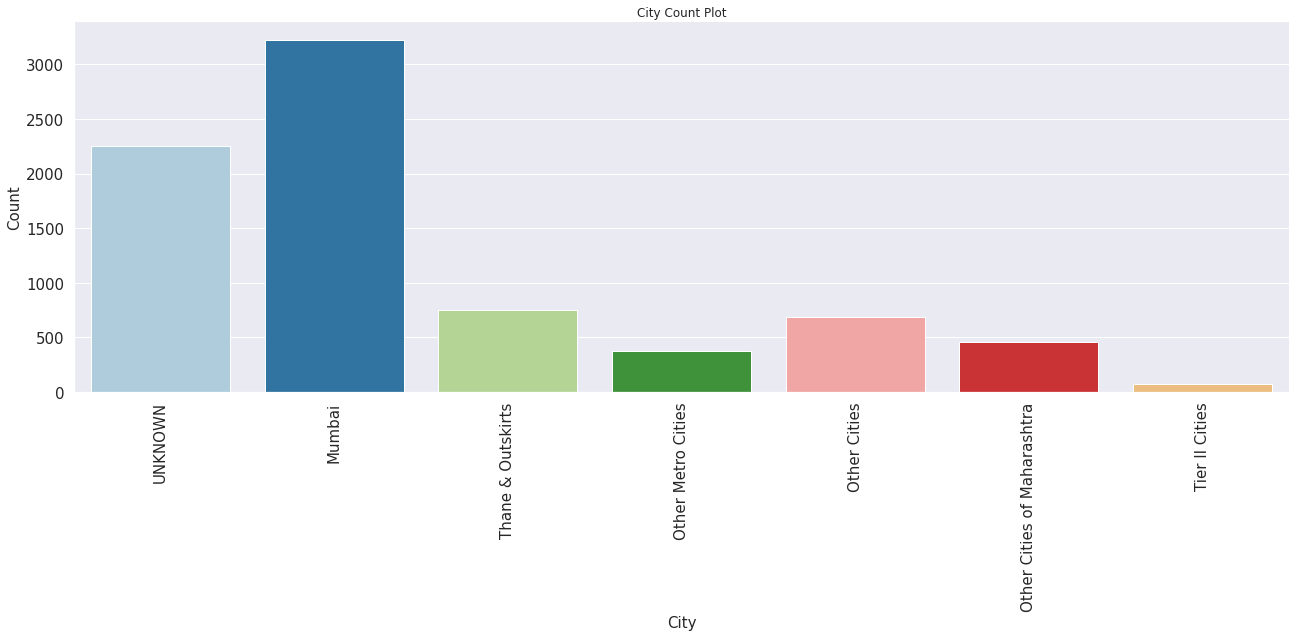

In [37]:
sns.catplot(data = DF[categ_col], x = 'City', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'City Count Plot')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=15)
plt.xlabel("City", size = 15)
plt.ylabel("Count", size = 15)
plt.show()

In the data **15% Null values** in our **City** columns but most of the users who have filled the lead form are from **"Mumbai"** but most people have not selected their city are marked as **UNKNOWN**

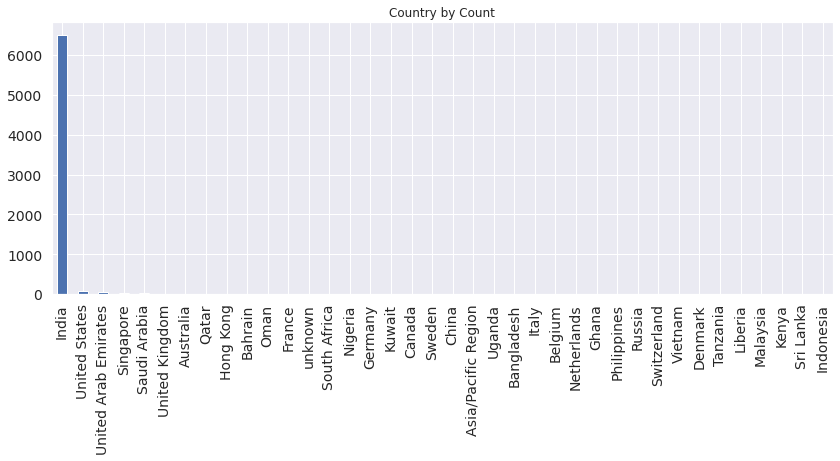

In [38]:
plt.figure(figsize=(14,5))
DF.Country.value_counts().plot(kind = 'bar').set(title = "Country by Count")
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

Based on the above count plot we can say that mostly audience are from **"India"**.



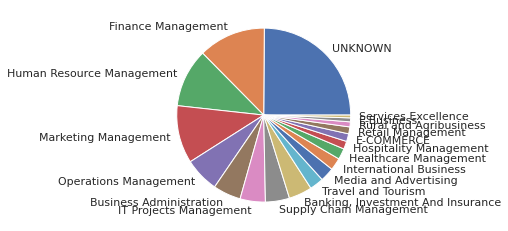

In [39]:
data=DF['Specialization'].value_counts()

plt.pie(data.values, labels = data.index)
plt.show() 


**>>** In the **Specialization,**  the data have **~16% Null values** and **21% people** have not selected the values and marked as **UNKNOWN**. 

**>>** But apart from that **Finance Management, HR & Marketing Management** are the most popular specialization among the users.

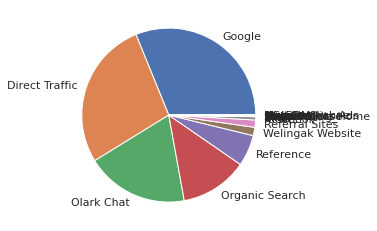

In [40]:
data=DF['Lead Source'].value_counts()

plt.pie(data.values, labels = data.index)
plt.show() 


**>>** Here **"Google"** is the most popular **lead source** destination followed by **"Direct Traffic", "Olark Chat" and "Organic Search"**. 

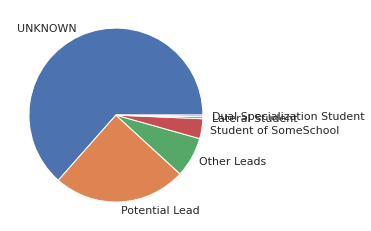

In [41]:
data=DF['Lead Profile'].value_counts()

plt.pie(data.values, labels = data.index)
plt.show() 

**>>** In **Lead Profile** Distribution, we have **29.3% Null Values** with **~45%** have not selected the values marked as **UNKNOWN**.



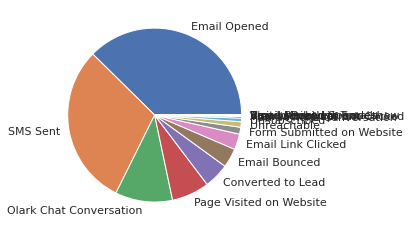

In [42]:
data=DF['Last Activity'].value_counts()

plt.pie(data.values, labels = data.index)
plt.show() 

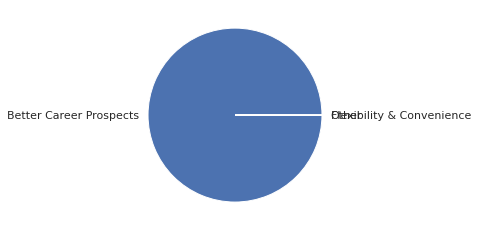

In [43]:
data=DF['What matters most to you in choosing a course'].value_counts()

plt.pie(data.values, labels = data.index)
plt.show() 

**>>** Here the data shows that the prospects who have filled the lead form for course inquiry are looking for **"Better Career Prospects"** which is obvious that's what we human are. We always seek to look for better opportunity.

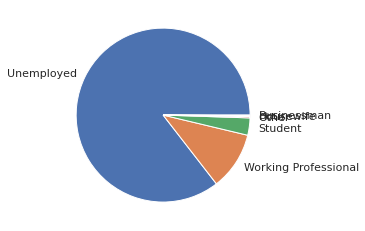

In [44]:
data=DF['What is your current occupation'].value_counts()

plt.pie(data.values, labels = data.index)
plt.show() 

**>>** Here in the ocupation column mostly users who have filled this form are **"Unemployed"**. Apart from that **"Working Professional"** are also looking to upskill themselves for better career opportunities.

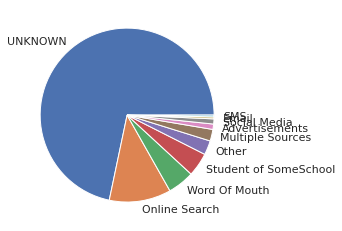

In [45]:
data=DF['How did you hear about X Education'].value_counts()

plt.pie(data.values, labels = data.index)
plt.show()

**>>** In acquistion of the applicants, if we exclude the not "UNKNOWN" and "null" values, the "Online Search" is the most popular user acquisiton medium followed by "Word of Mouth".

### **`Categorical Features Engineering  `**


In [46]:
DF[categ_col].isna().sum().sort_values(ascending=False)

Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Receive More Updates About Our Courses              0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
Through Recommendations                             0
Digital Advertisement       

`Lead Source Null treatment`

In [47]:
DF['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

**>>** As we have data inconsistency in **Lead source* columns with **google** and **Google**

In [48]:
DF['Lead Source'].replace(to_replace = 'google', value = 'Google', inplace = True)

In [49]:
DF['Lead Source'].replace(to_replace = np.nan, value = 'Others', inplace = True)


`Last Activity Nulls treatment`

In [50]:
DF[DF['Last Activity'].isnull()]['Tags'].value_counts()


Closed by Horizzon                     47
Will revert after reading the email    26
Ringing                                12
Interested in other courses             4
Lost to EINS                            2
number not provided                     1
Busy                                    1
Interested  in full time MBA            1
Name: Tags, dtype: int64

In [51]:
print(DF[(DF['Tags'] == 'Closed by Horizzon')]['Last Activity'].mode())
print(DF[(DF['Tags'] == 'Will revert after reading the email')]['Last Activity'].mode())
print(DF[(DF['Tags'] == 'Ringing')]['Last Activity'].mode())
print(DF[(DF['Tags'] == 'Interested in other courses')]['Last Activity'].mode())
print(DF[(DF['Tags'] == 'number not provided')]['Last Activity'].mode())
print(DF[(DF['Tags'] == 'Busy')]['Last Activity'].mode())
print(DF[(DF['Tags'] == 'Interested  in full time MBA')]['Last Activity'].mode())


0    Email Opened
dtype: object
0    SMS Sent
dtype: object
0    Email Opened
dtype: object
0    Email Opened
dtype: object
0    SMS Sent
dtype: object
0    SMS Sent
dtype: object
0    Email Opened
dtype: object


In [52]:
DF.loc[(DF['Last Activity'].isnull()) & (DF['Tags'] == 'Closed by Horizzon'), 'Last Activity'] = 'Email Opened'
DF.loc[(DF['Last Activity'].isnull()) & (DF['Tags'] == 'Will revert after reading the email'), 'Last Activity'] = 'SMS Sent'
DF.loc[(DF['Last Activity'].isnull()) & (DF['Tags'] == 'Ringing'), 'Last Activity'] = 'Email Opened'
DF.loc[(DF['Last Activity'].isnull()) & (DF['Tags'] == 'Interested in other courses'), 'Last Activity'] = 'Email Opened'
DF.loc[(DF['Last Activity'].isnull()) & (DF['Tags'] == 'Lost to EINS'), 'Last Activity'] = 'Email Opened'
DF.loc[(DF['Last Activity'].isnull()) & (DF['Tags'] == 'number not provided'), 'Last Activity'] = 'SMS Sent'
DF.loc[(DF['Last Activity'].isnull()) & (DF['Tags'] == 'Busy'), 'Last Activity'] = 'SMS Sent'
DF.loc[(DF['Last Activity'].isnull()) & (DF['Tags'] == 'Interested  in full time MBA'), 'Last Activity'] = 'Email Opened'


In [53]:
DF['Last Activity'].isna().sum()

9

In [54]:
(DF[(DF['What matters most to you in choosing a course'] == 'Better Career Prospects') & (DF['What is your current occupation'] == 'Unemployed')]['Last Activity']).mode()


0    Email Opened
dtype: object

In [55]:
DF['Last Activity'].replace(to_replace = np.nan, value = 'Email Opened', inplace = True)

In [56]:

DF.isna().sum().sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Lead Number                                         0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
X Education Forums                                  0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Newspaper                                           0
Search                      

In [57]:
drop_col=["Country"]
DF.drop(drop_col, axis = 1, inplace = True)
categ_col=[i for i in categ_col if i not in drop_col]


In [58]:
# Filling NAN values with Unknown 
null_vars1=['Specialization','How did you hear about X Education','Lead Profile','City']
for i in null_vars1:
    DF[i].replace(to_replace=np.nan, value='UNKNOWN', inplace=True)
   
    
# imputing with most frequent item in a itemset
DF["What matters most to you in choosing a course"].replace(to_replace = np.nan, value = 'Better Career Prospects', inplace = True)
DF["What is your current occupation"].replace(to_replace = np.nan, value = 'Unemployed', inplace = True)


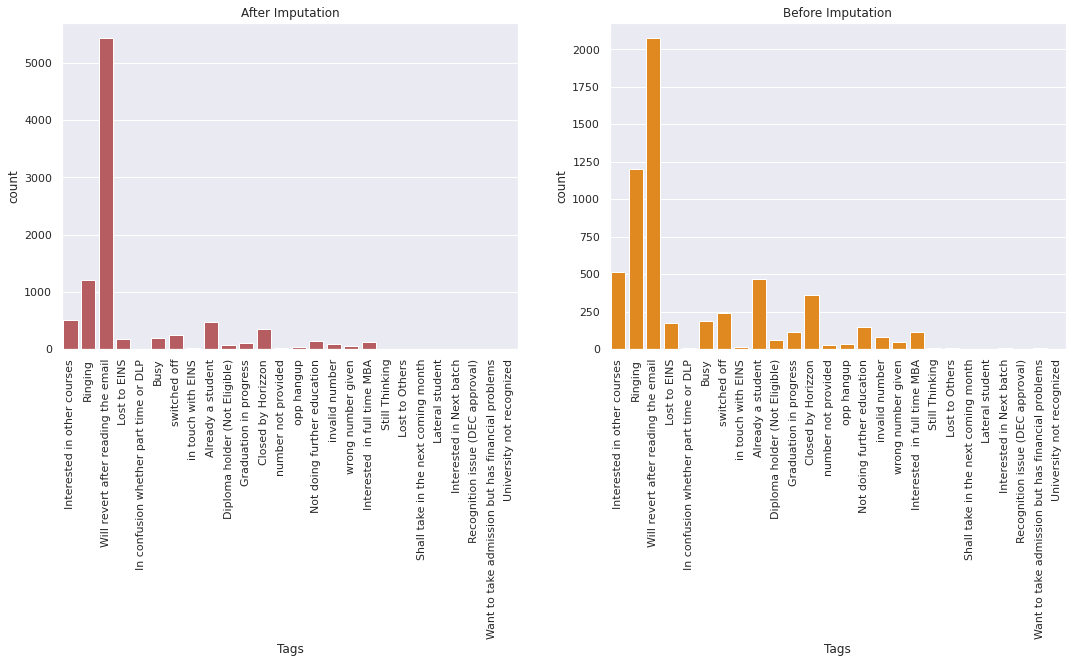

In [59]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title("After Imputation")
sns.countplot(DF['Tags'].fillna("Will revert after reading the email"), color = 'r')
plt.xticks(rotation = "vertical")
plt.subplot(122)
plt.title("Before Imputation")
sns.countplot(DF['Tags'], color = 'darkorange')
plt.xticks(rotation = "vertical")
plt.show()

In [60]:
DF['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [61]:
DF['Tags'].replace(to_replace = np.nan, value = 'Will revert after reading the email', inplace = True)

In [62]:
DF = DF.iloc[:, [0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,5]]

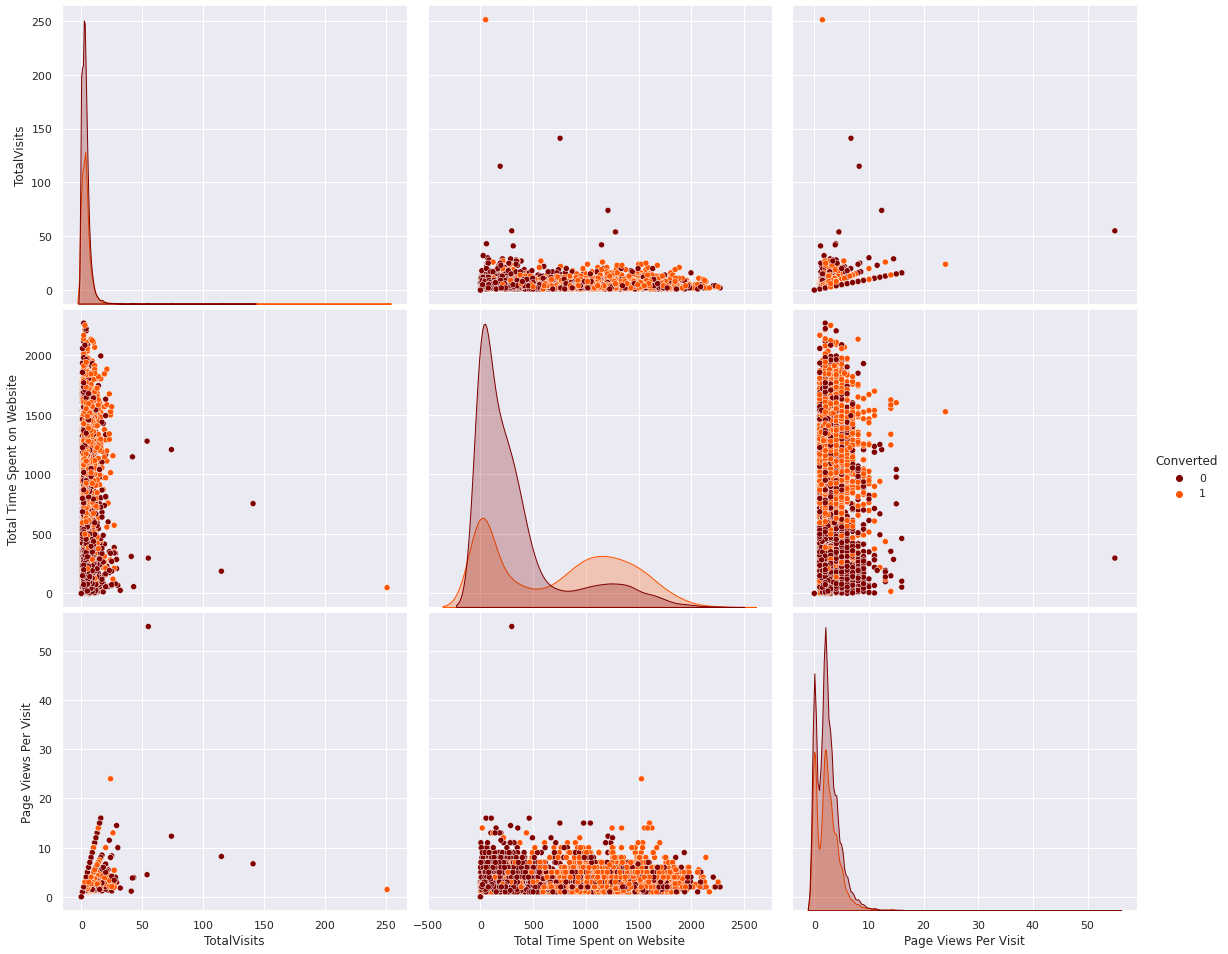

In [63]:
sns.pairplot(DF.iloc[:, [5,6,7,-1]], hue = 'Converted', palette = 'gist_heat', height = 4.5, aspect = 1.2)

We can clearly see some of the potential outliers in our data also the data seems to be skewed for the different classes.

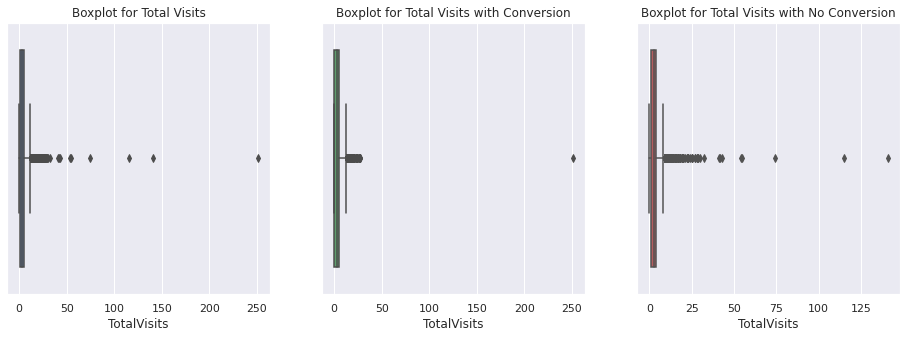

In [64]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.title("Boxplot for Total Visits")
sns.boxplot(data = DF, x = 'TotalVisits')
plt.subplot(132)
plt.title("Boxplot for Total Visits with Conversion")
sns.boxplot(data = DF.query("Converted == 1"), x = 'TotalVisits', hue = 'Converted', color = 'g')
plt.subplot(133)
plt.title("Boxplot for Total Visits with No Conversion")
sns.boxplot(data = DF.query("Converted == 0"), x = 'TotalVisits', hue = 'Converted', color = 'r')
plt.show()

As we already see in our pairplot for the extreme values but via this boxplot, now we are clearly see some high extreme values in our data for the Total Visits.

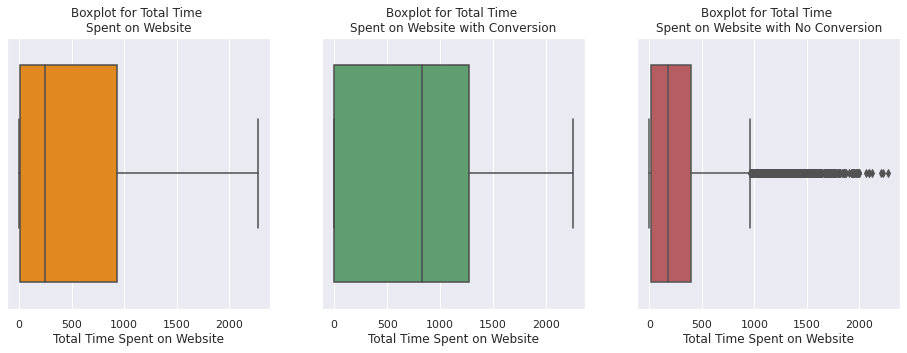

In [65]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.title("Boxplot for Total Time \nSpent on Website")
sns.boxplot(data = DF, x = 'Total Time Spent on Website', color = 'darkorange')
plt.subplot(132)
plt.title("Boxplot for Total Time \nSpent on Website with Conversion")
sns.boxplot(data = DF.query("Converted == 1"), x = 'Total Time Spent on Website', hue = 'Converted', color = 'g')
plt.subplot(133)
plt.title("Boxplot for Total Time \nSpent on Website with No Conversion")
sns.boxplot(data = DF.query("Converted == 0"), x = 'Total Time Spent on Website', hue = 'Converted', color = 'r')
plt.show()

Here we can see some potential outliers for the class with **"No Conversion"** but when we look data at the aggregate level the effect of **"No Conversion"** seems to be neutralize because of **"Conversion** class seems to be far less skewed as compared to **"No Conversion"** class.

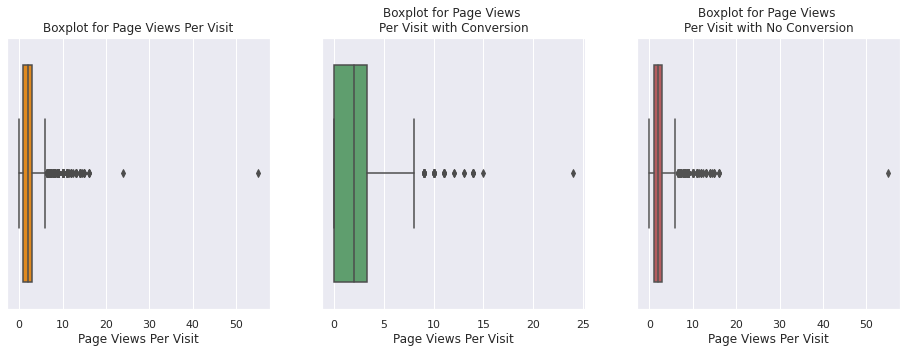

In [66]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.title("Boxplot for Page Views Per Visit")
sns.boxplot(data = DF, x = 'Page Views Per Visit', color = 'darkorange')
plt.subplot(132)
plt.title("Boxplot for Page Views \nPer Visit with Conversion")
sns.boxplot(data = DF.query("Converted == 1"), x = 'Page Views Per Visit', hue = 'Converted', color = 'g')
plt.subplot(133)
plt.title("Boxplot for Page Views \nPer Visit with No Conversion")
sns.boxplot(data = DF.query("Converted == 0"), x = 'Page Views Per Visit', hue = 'Converted', color = 'r')
plt.show()

We can also see some extreme values here as well which indicated that we need to fix these outliers before procedding with our analysis.

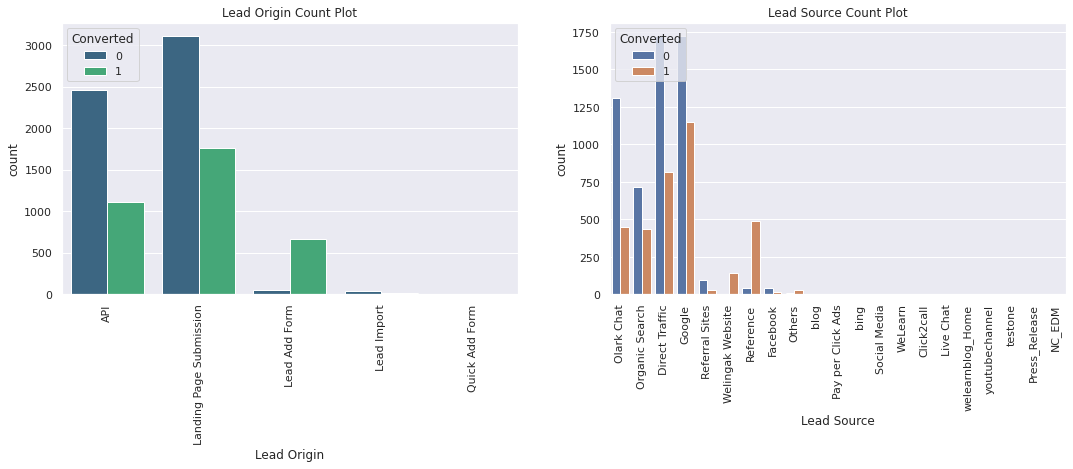

In [67]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.title("Lead Origin Count Plot")
sns.countplot(data = DF, x = 'Lead Origin', hue = 'Converted', palette = 'viridis')
plt.xticks(rotation = '90')
plt.subplot(122)
plt.title("Lead Source Count Plot")
sns.countplot(data = DF, x = 'Lead Source', hue = 'Converted')
plt.xticks(rotation = '90')
plt.show()

In [68]:
compare=['Do Not Email','Do Not Call','Search',
 'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview',]


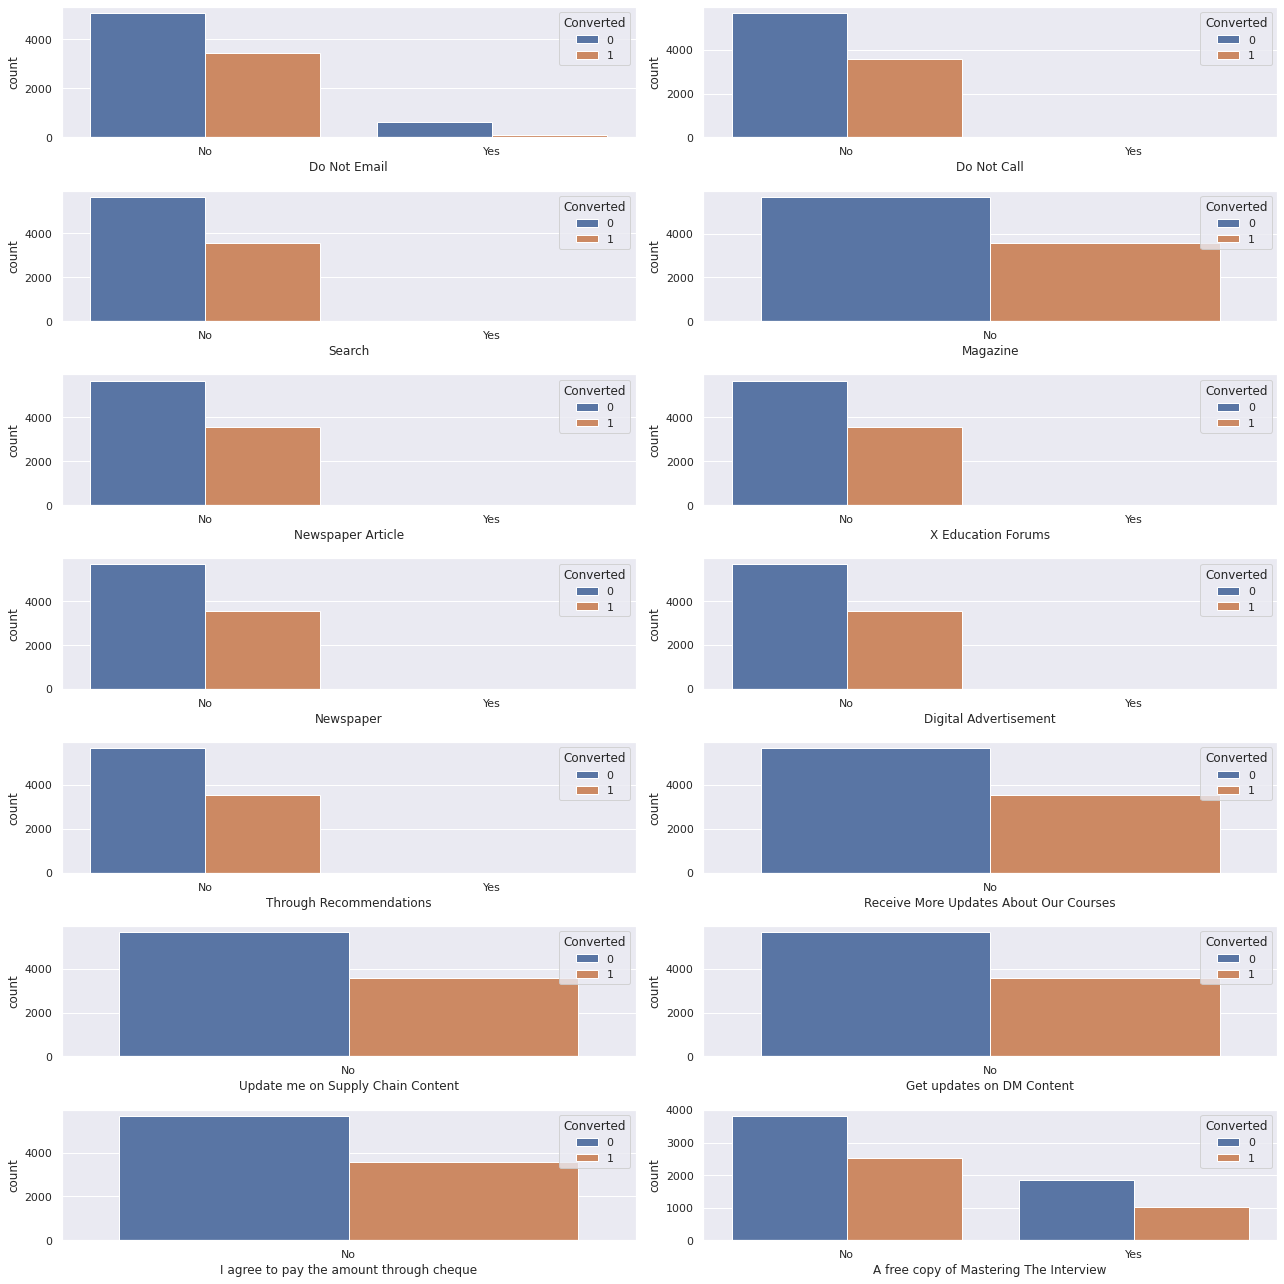

In [69]:
fig, ax = plt.subplots(7, 2, figsize=(18,18))
axes_ = [axes_row for axes in ax for axes_row in axes]

for idx, val in enumerate(compare):
    if val == 'Last Notable Activity':
        continue
    else:
        g = sns.countplot(data = DF, x = val, hue = 'Converted', ax = axes_[idx])
        plt.tight_layout()

Based on that we can see that the proportional of users who not converted is high as compared to the users who converted. Also, the users are not much interested in "Free Copy of Mastering the Interview" which is weired because who does not like freebies. The reason maybe we have large proportion of audience who are "Unemployed" and the only thing they are interested about upskilling themeselves and not giving priority to the interview preparation on the early stage. Also, there are certain columns from which we are not going to inference much information as most of the values are "No" so we will going to drop the same in the later stage.

### **`Outlier Analysis`**

In [70]:
def check_outlier(data, col):
    
    #calculating quartile deviation
    q1 = np.quantile(data[col], q = 0.25)
    q3 = np.quantile(data[col], q = 0.75)
    
    #calculating inter-quartile range
    iqr = q3-q1
    
    #calculating lower and upper bound
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    #filtering data with outliers
    outlier = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    #plotting the result
    plt.figure(figsize=(14,8))
    plt.subplot(211)
    plt.title("%s with Outliers" %(col))
    plt.plot(data[col])
    sns.scatterplot(data = outlier, x = outlier.index, y = outlier.values, marker = 'X', color = 'k', s=70)
    plt.subplot(212)
    sns.boxplot(data = data, x = col, color = 'g')
    plt.show()

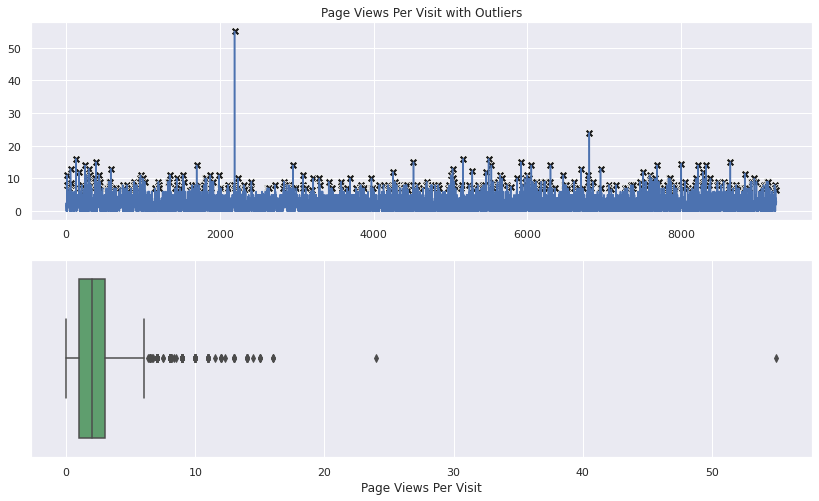

In [71]:
check_outlier(DF, 'Page Views Per Visit')

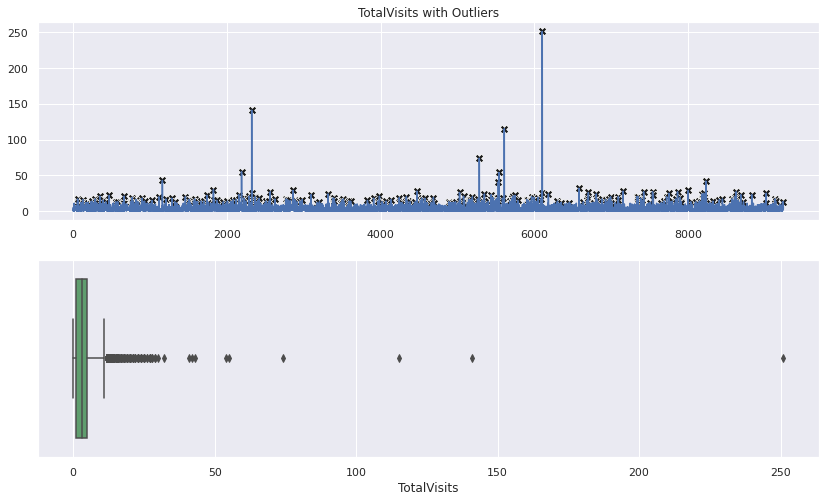

In [72]:
check_outlier(DF, 'TotalVisits')

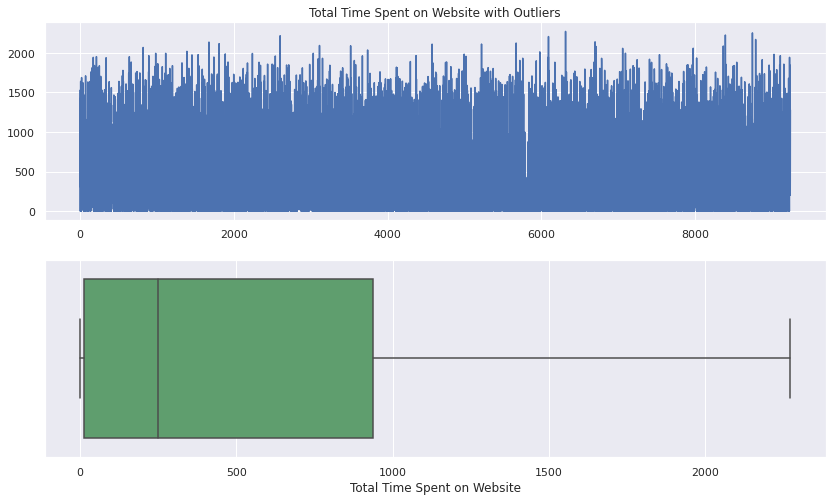

In [73]:
check_outlier(DF, 'Total Time Spent on Website')

In [74]:
DF.iloc[:, [5,6,7]].describe(percentiles = [0.01, 0.1, 0.25, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
TotalVisits,9240.0000,3.4386,4.8190,0.0000,0.0000,0.0000,1.0000,3.0000,5.0000,7.0000,10.0000,17.0000,251.0000
Total Time Spent on Website,9240.0000,487.6983,548.0215,0.0000,0.0000,0.0000,12.0000,248.0000,936.0000,1380.0000,1562.0000,1840.6100,2272.0000
Page Views Per Visit,9240.0000,2.3574,2.1458,0.0000,0.0000,0.0000,1.0000,2.0000,3.0000,5.0000,6.0000,9.0000,55.0000


As we can see here how the values are changing from 99 percentile to max which indicates there is something wrong in our data. The sudden increase in our values from 99 percentile to max will make our distribution skewed so we need to fix it.

In [75]:
anomaly_data = DF.iloc[:, [5,6,7]]

In [76]:
y = DF.iloc[:, -1]

In [77]:
se = StandardScaler()

In [78]:
le = LogisticRegression(random_state = 42)

In [79]:
scaled_df = pd.DataFrame(se.fit_transform(anomaly_data), columns = anomaly_data.columns)

In [80]:
contamination = [0.1,0.01,0.001,0.05,0.005,0.0001]
k_neighbor = [3,5,7,9, 12, 15, 18, 21, 25]

In [81]:
lof_params = list(product(contamination, k_neighbor))

In [82]:
scores = []


In [83]:
for c, k in lof_params:
    
    lof = LocalOutlierFactor(n_neighbors=k, contamination=c, n_jobs = -1)
    predict = lof.fit_predict(scaled_df)
    mask = pd.DataFrame(predict)
    mask.columns = ["anomaly"]
    filter_df = pd.concat([scaled_df, mask], axis = 1).query('anomaly == 1').reset_index().drop("index", axis = 1)
    filter_y = pd.concat([y, mask], axis = 1).query('anomaly == 1').reset_index().drop("index", axis = 1)
    filter_df = filter_df.iloc[:, :3]
    filter_y = filter_y.iloc[:, :1]
    cv_score = cross_val_score(estimator= le, X = filter_df, y = filter_y, cv = 10, scoring = 'accuracy')
    scores.append(np.mean(cv_score))
    print(np.mean(cv_score))

0.7104753887808941
0.713086642599278
0.7124852471535684
0.7133270272146626
0.7135679903730445
0.7142884210404518
0.7141680840970102
0.7122792858465241
0.7130853408775341
0.7151746724890831
0.716521385610599
0.7157565974339659
0.7160848250050819
0.7158663653429947
0.7165219834750272
0.7164124547117696
0.7157563582881945
0.7153191998182491
0.7158179848320694
0.7157374315825019
0.7163596966413868
0.7164680390032502
0.7165763813651137
0.7164680390032502
0.7164680390032502
0.7165763813651137
0.7164680390032502
0.7131469105435542
0.7144646924829157
0.7140592410968226
0.7154267629083411
0.7151992322137749
0.7157685784266616
0.7148568972189826
0.7155398789100345
0.7139456056186576
0.7159474578671576
0.7160892037659081
0.7154363201968112
0.7157625254293418
0.7157625254293418
0.7159803898377253
0.7157628802573686
0.7157627619813597
0.7156537115011591
0.7162049218387245
0.7161255411255412
0.7160966967304996
0.7160966967304996
0.7162049218387246
0.7162049218387246
0.7162049218387246
0.716204921838

In [84]:
param_df = pd.DataFrame(lof_params, columns = ["contamination", "neighbors"])

In [85]:
scores_df = pd.DataFrame(scores, columns = ["scores"])

In [86]:
lof_perf_df = pd.concat([param_df, scores_df], axis = 1)

In [87]:
lof_pivot = pd.pivot_table(data = lof_perf_df, index = 'contamination', columns = 'neighbors', values = 'scores')

In [88]:
lof_pivot

neighbors,3,5,7,9,12,15,18,21,25
contamination,,,,,,,,,
0.0001,0.7162,0.7161,0.7161,0.7161,0.7162,0.7162,0.7162,0.7162,0.7162
0.0010,0.7158,0.7157,0.7164,0.7165,0.7166,0.7165,0.7165,0.7166,0.7165
0.0050,0.7159,0.7161,0.7154,0.7158,0.7158,0.7160,0.7158,0.7158,0.7157
0.0100,0.7152,0.7165,0.7158,0.7161,0.7159,0.7165,0.7164,0.7158,0.7153
0.0500,0.7131,0.7145,0.7141,0.7154,0.7152,0.7158,0.7149,0.7155,0.7139
0.1000,0.7105,0.7131,0.7125,0.7133,0.7136,0.7143,0.7142,0.7123,0.7131


<AxesSubplot:xlabel='neighbors', ylabel='contamination'>

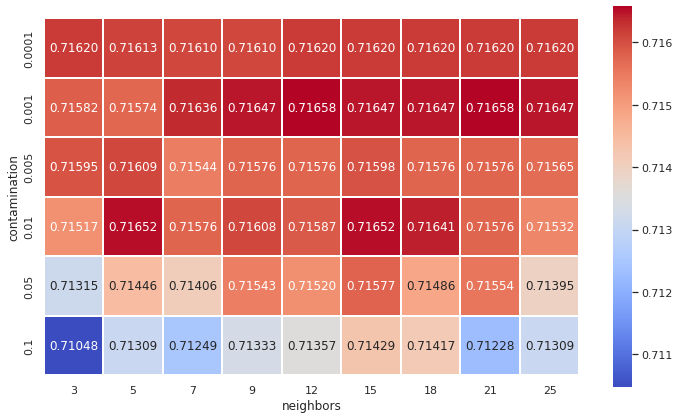

In [89]:
plt.figure(figsize=(12,7))
sns.heatmap(lof_pivot, annot = True, fmt = ".5f", cmap = 'coolwarm', square = True, linewidths=0.025)

In [90]:
lof = LocalOutlierFactor(contamination=0.001, n_neighbors=21, n_jobs = -1)

In [91]:
lof_fit = lof.fit_predict(scaled_df)

In [92]:
DF.insert(29, "anomaly", pd.Series(lof_fit))

In [93]:
DF.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,anomaly,Converted
0,660737,API,Olark Chat,No,No,0.0000,0,0.0000,Page Visited on Website,UNKNOWN,UNKNOWN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,UNKNOWN,UNKNOWN,No,No,Modified,1,0
1,660728,API,Organic Search,No,No,5.0000,674,2.5000,Email Opened,UNKNOWN,UNKNOWN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,UNKNOWN,UNKNOWN,No,No,Email Opened,1,0
2,660727,Landing Page Submission,Direct Traffic,No,No,2.0000,1532,2.0000,Email Opened,Business Administration,UNKNOWN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened,1,1
3,660719,Landing Page Submission,Direct Traffic,No,No,1.0000,305,1.0000,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,UNKNOWN,Mumbai,No,No,Modified,1,0
4,660681,Landing Page Submission,Google,No,No,2.0000,1428,1.0000,Converted to Lead,UNKNOWN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,UNKNOWN,Mumbai,No,No,Modified,1,1


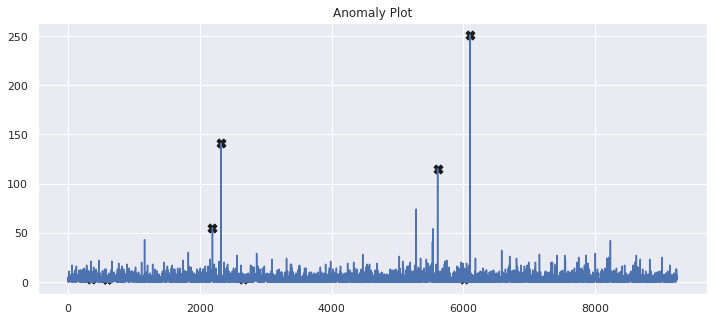

In [94]:
plt.figure(figsize=(12,5))
plt.title("Anomaly Plot")
plt.plot(DF["TotalVisits"])
plt.scatter(x = DF[DF["anomaly"] == -1]["TotalVisits"].index, y = DF[DF["anomaly"] == -1]["TotalVisits"].values, marker = "X", color = 'k', s = 80)

In [95]:
anomaly_idx = DF[DF["anomaly"] == -1].index

In [96]:
filter_df = DF.drop(anomaly_idx, axis = 0).reset_index().drop("index", axis = 1)

In [97]:
filter_df.drop("anomaly", axis = 1, inplace = True)

In [98]:
filter_df.iloc[:, :-1].describe()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9230.0000,9230.0000,9230.0000,9230.0000
mean,617169.9190,3.3795,488.0693,2.3510
std,23401.7605,3.5940,548.1538,2.0744
min,579533.0000,0.0000,0.0000,0.0000
25%,596475.7500,1.0000,12.0000,1.0000
50%,615470.5000,3.0000,249.0000,2.0000
75%,637372.2500,5.0000,936.7500,3.0000
max,660737.0000,74.0000,2272.0000,24.0000


We are at the end of our EDA, Feature Engineering & Outlier Analysis Part but for the Outlier Analysis, we have detected some extreme outliers using LOF and removed them from our data but still there are some extreme values based on the boxplot but for this analysis, we are keeping those extreme values and build our model if our model did not perform well than in that case we will going to tweak our model by removing these extreme values or applying winzoriazation on it.

In [99]:
drop_cols = ["Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper",
             "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses",
            "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]


In [100]:
filter_df.drop(drop_cols, axis = 1, inplace = True)

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [102]:
cat_feature = filter_df.dtypes[filter_df.dtypes == 'object'].keys()

In [103]:
cat_feature

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [104]:
num_feature = filter_df.dtypes[(filter_df.dtypes == 'int64') | (filter_df.dtypes == 'float64')].keys()[[1,2,3]]

In [105]:
num_feature

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [106]:
se = StandardScaler()

In [107]:
encode_num = pd.DataFrame(se.fit_transform(filter_df[num_feature]), columns = num_feature)

In [108]:
cat_feature

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

## <a id="32"> Step 3: Feature Engineering/Dummies Creation </a>


In [109]:
encoded_cat_df = pd.get_dummies(filter_df[cat_feature], drop_first = True)

In [110]:
final_encoded_df = pd.concat([encode_num, encoded_cat_df], axis = 1)

In [111]:
final_encoded_df.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_UNKNOWN,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_UNKNOWN,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,-0.9404,-0.8904,-1.1334,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.4509,0.3392,0.0719,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-0.3839,1.9046,-0.1692,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,-0.6621,-0.3340,-0.6513,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.3839,1.7148,-0.6513,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0

## <a id="32"> Step 4: Feature Selection </a>


In [112]:
from sklearn.feature_selection import mutual_info_classif

In [113]:
filter_df.iloc[:, -1]

0       0
1       0
2       1
3       0
4       1
       ..
9225    1
9226    0
9227    0
9228    1
9229    1
Name: Converted, Length: 9230, dtype: int64

In [114]:
importances = mutual_info_classif(final_encoded_df, filter_df.iloc[:, -1])

In [115]:
mutual_score = pd.DataFrame([ final_encoded_df.columns, importances], index = ["Features", "Importance"]).T.sort_values(by = "Importance", ascending = False).reset_index().drop("index", axis = 1)

In [116]:
mutual_score

,Features,Importance
0,Total Time Spent on Website,0.1166
1,Lead Profile_Potential Lead,0.0776
2,Tags_Will revert after reading the email,0.0710
3,What is your current occupation_Working Professional,0.0585
4,Last Activity_SMS Sent,0.0556
5,Lead Origin_Lead Add Form,0.0534
6,Tags_Ringing,0.0514
7,Last Notable Activity_SMS Sent,0.0508
8,Lead Profile_UNKNOWN,0.0459
9,What is your current occupation_Unemployed,0.0449


In [117]:
low_score_col = mutual_score[mutual_score["Importance"] == 0].Features.values

In [118]:
high_score_col = mutual_score[mutual_score["Importance"] > 0].Features.values

In [119]:
classif_data = final_encoded_df[high_score_col]

In [120]:
def data_set_(df):
    rows, cols = df.shape
    print("We have",rows,"rows and",cols,"columns for building regression model")
data_set_(classif_data)

We have 9230 rows and 78 columns for building regression model


In [121]:
X = classif_data
y = filter_df.iloc[:, -1]

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
dataset_train, dataset_test = train_test_split(pd.concat([X, y], axis = 1), test_size = 0.25, random_state = 101 )

In [124]:
#train and test dataset shape including output variable
def train_test(df1,df2):
    rows1, cols1 = df1.shape
    rows2, cols2 = df2.shape
    
    print("We have",rows1,"rows and",cols1,"columns to train the model")
    print("-~-"*17)
    print("We have",rows2,"rows and",cols2,"columns to test the model")
train_test(dataset_train,dataset_test)  

We have 6922 rows and 79 columns to train the model
-~--~--~--~--~--~--~--~--~--~--~--~--~--~--~--~--~-
We have 2308 rows and 79 columns to test the model


In [125]:
y_train=dataset_train.pop('Converted')
X_train=dataset_train

## <a id="32"> Step 5: Building the model </a>


## `Training the model`

In [126]:
# Statsmodel
import statsmodels.api as sm

### Model-1

In [127]:
# Instantiate the model
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
# Fit the model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6922
Model:                            GLM   Df Residuals:                     6845
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1556.5
Date:                Sat, 25 Feb 2023   Deviance:                       3112.9
Time:                        10:52:16   Pearson chi2:                 1.93e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -0.2892      1.461     -0.198      0.843      -3.153       2.574
Total Time Spent on Website                                1.1458      0.056     20.352      0.000       1.035       1.256
Lead Profile_Potential Lead                                0.1530      1.097      0.139      0.889      -1.997       2.303
Tags_Will revert after reading the email                   4.7418      0.438     10.834      0.000       3.884       5.600
What is your current occupation_Working Professional       1.2262      0.479      2.560      0.010       0.287       2.165
Last Activity_SMS Sent                                     0.0160      0.682      0.023      0.981      -1.321       1.353
Lead Origin_Lead Add Form                                  2.6699      0.672      3.974      0.000       1.353       3.987
Tags_Ringing                                              -0.4057      0.485     -0.836      0.403      -1.357       0.545
Last Notable Activity_SMS Sent                             1.7732      0.244      7.252      0.000       1.294       2.252
Lead Profile_UNKNOWN                                      -2.8133      1.088     -2.587      0.010      -4.945      -0.681
What is your current occupation_Unemployed                -0.8676      0.404     -2.146      0.032      -1.660      -0.075
Lead Source_Reference                                     -0.9254      0.718     -1.289      0.197      -2.332       0.481
Tags_Closed by Horizzon                                    9.6412      0.876     11.005      0.000       7.924      11.358
Last Notable Activity_Modified                            -0.7474      0.162     -4.621      0.000      -1.064      -0.430
Last Activity_Olark Chat Conversation                     -1.8211      0.696     -2.615      0.009      -3.186      -0.456
Tags_Interested in other courses                           0.0114      0.599      0.019      0.985      -1.162       1.185
Lead Source_Olark Chat                                     0.6234      0.201      3.101      0.002       0.229       1.018
Lead Source_Welingak Website                               2.7735      1.207      2.297      0.022       0.407       5.140
Tags_Lost to EINS                                          9.6644      0.752     12.853      0.000       8.191      11.138
Last Notable Activity_Had a Phone Conversation            26.9928   3.88e+04      0.001      0.999   -7.61e+04    7.62e+04
Tags_invalid number                                      -20.7632    1.3e+04     -0.002      0.999   -2.55e+04    2.55e+04
Tags_switched off                                         -0.8040      0.692     -1.162      0.245      -2.160       0.552
Tags_Not

***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. All the featrue's P-values are close to 0 

***Coarse tuning (Auto+Manual)***

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [128]:
# Importing scikit learn linear model as stats model will not work with RFE
from sklearn.linear_model import LogisticRegression
# Instantiate logistice regression model
logreg = LogisticRegression()

###### RFE with 15 coulmns

In [129]:
# Importing RFE
from sklearn.feature_selection import RFE
# Instantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select= 15 )
# Fit the train set
rfe = rfe.fit(X_train, y_train)

In [130]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
13,Last Activity_Olark Chat Conversation,True,1
42,Lead Profile_Student of SomeSchool,True,1
21,Tags_Not doing further education,True,1
19,Tags_invalid number,True,1
18,Last Notable Activity_Had a Phone Conversation,True,1
17,Tags_Lost to EINS,True,1
16,Lead Source_Welingak Website,True,1
37,Tags_Busy,True,1
11,Tags_Closed by Horizzon,True,1
29,Last Activity_Email Bounced,True,1


In [131]:
# RFE selected columns
col = X_train.columns[rfe.support_]
col

Index(['Tags_Will revert after reading the email',
       'What is your current occupation_Working Professional',
       'Lead Origin_Lead Add Form', 'Last Notable Activity_SMS Sent',
       'Lead Profile_UNKNOWN', 'Tags_Closed by Horizzon',
       'Last Activity_Olark Chat Conversation', 'Lead Source_Welingak Website',
       'Tags_Lost to EINS', 'Last Notable Activity_Had a Phone Conversation',
       'Tags_invalid number', 'Tags_Not doing further education',
       'Last Activity_Email Bounced', 'Tags_Busy',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [132]:
# RFE not selected columns
X_train.columns[~rfe.support_]

Index(['Total Time Spent on Website', 'Lead Profile_Potential Lead',
       'Last Activity_SMS Sent', 'Tags_Ringing',
       'What is your current occupation_Unemployed', 'Lead Source_Reference',
       'Last Notable Activity_Modified', 'Tags_Interested in other courses',
       'Lead Source_Olark Chat', 'Tags_switched off',
       'Last Activity_Unsubscribed',
       'How did you hear about X Education_Other',
       'Specialization_Human Resource Management',
       'Last Activity_View in browser link Clicked',
       'Specialization_E-COMMERCE', 'Lead Source_blog',
       'Specialization_UNKNOWN', 'Specialization_Healthcare Management',
       'Specialization_Supply Chain Management', 'Lead Source_Google',
       'Lead Origin_Landing Page Submission',
       'Last Activity_Page Visited on Website',
       'Lead Source_Pay per Click Ads', 'Tags_Graduation in progress',
       'Lead Profile_Other Leads', 'City_Tier II Cities', 'City_Other Cities',
       'Lead Origin_Quick Add Form', 

### Model-2
With all RFE variables.

In [133]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train[col])
# Instantiate the model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
# Fit the model
log_model_2 = logm2.fit()
log_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6922
Model:                            GLM   Df Residuals:                     6906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1908.3
Date:                Sat, 25 Feb 2023   Deviance:                       3816.5
Time:                        10:52:25   Pearson chi2:                 2.63e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9719      0.165    -18.026      0.000      -3.295      -2.649
Tags_Will revert after reading the email                 5.0070      0.181     27.651      0.000       4.652       5.362
What is your current occupation_Working Professional     2.1662      0.242      8.959      0.000       1.692       2.640
Lead Origin_Lead Add Form                                1.3732      0.271      5.070      0.000       0.842       1.904
Last Notable Activity_SMS Sent                           2.6571      0.106     25.094      0.000       2.450       2.865
Lead Profile_UNKNOWN                                    -3.0953      0.136    -22.754      0.000      -3.362      -2.829
Tags_Closed by Horizzon                                  9.5541      0.746     12.810      0.000       8.092      11.016
Last Activity_Olark Chat Conversation                   -1.4362      0.172     -8.332      0.000      -1.774      -1.098
Lead Source_Welingak Website                             3.4660      1.049      3.303      0.001       1.409       5.523
Tags_Lost to EINS                                        9.6300      0.621     15.509      0.000       8.413      10.847
Last Notable Activity_Had a Phone Conversation          25.3749   3.84e+04      0.001      0.999   -7.52e+04    7.53e+04
Tags_invalid number                                    -20.8372   1.32e+04     -0.002      0.999    -2.6e+04    2.59e+04
Tags_Not doing further education                        -1.3737      1.083     -1.269      0.205      -3.496       0.749
Last Activity_Email Bounced                             -1.5289      0.308     -4.961      0.000      -2.133      -0.925
Tags_Busy                                                4.4497      0.275     16.195      0.000       3.911       4.988
Lead Profile_Student of SomeSchool                      -2.1560      0.960     -2.245      0.025      -4.038      -0.274
========================================================================================================================
"""

**>>** Other than **Tags_invalid number** and **Tags_wrong number given** P-values of variables are under accepted significance range

**Top 5 highest coefficients variables**
1. Tags_Closed by Horizzon
2. Tags_Lost to EINS
3. Lead Source_Welingak Website
4. Lead Profile_Student of SomeSchool
5. Tags_Not doing further education

### Checking VIFs

In [134]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Source_Welingak Website,1.2900
5,Tags_Closed by Horizzon,1.2000
12,Last Activity_Email Bounced,1.0800
13,Tags_Busy,1.0500
8,Tags_Lost to EINS,1.0400
11,Tags_Not doing further education,1.0400
10,Tags_invalid number,1.0300
14,Lead Profile_Student of SomeSchool,1.0200
9,Last Notable Activity_Had a Phone Conversation,1.0000
6,Last Activity_Olark Chat Conversation,0.3500


We can see that VIFs of all the variables are below 3. So, we can say that there is no multicollinearity in the columns we have selected.

### Model-3
Removing the variables which have high P-values

In [136]:
to_drop=['Tags_invalid number','Tags_wrong number given']
col=[var for var in col if var not in to_drop]


In [137]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train[col])
# Instantiate the model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
# Fit the model
log_model_3 = logm2.fit()
log_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6922
Model:                            GLM   Df Residuals:                     6907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1910.2
Date:                Sat, 25 Feb 2023   Deviance:                       3820.4
Time:                        10:52:26   Pearson chi2:                 2.67e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0060      0.165    -18.246      0.000      -3.329      -2.683
Tags_Will revert after reading the email                 5.0422      0.181     27.872      0.000       4.688       5.397
What is your current occupation_Working Professional     2.1706      0.242      8.960      0.000       1.696       2.645
Lead Origin_Lead Add Form                                1.3811      0.272      5.085      0.000       0.849       1.913
Last Notable Activity_SMS Sent                           2.6530      0.106     25.077      0.000       2.446       2.860
Lead Profile_UNKNOWN                                    -3.0960      0.136    -22.765      0.000      -3.363      -2.829
Tags_Closed by Horizzon                                  9.5875      0.746     12.854      0.000       8.126      11.049
Last Activity_Olark Chat Conversation                   -1.4363      0.172     -8.331      0.000      -1.774      -1.098
Lead Source_Welingak Website                             3.4582      1.049      3.295      0.001       1.401       5.515
Tags_Lost to EINS                                        9.6645      0.621     15.565      0.000       8.448      10.882
Last Notable Activity_Had a Phone Conversation          23.3967   1.41e+04      0.002      0.999   -2.76e+04    2.77e+04
Tags_Not doing further education                        -1.3419      1.083     -1.239      0.216      -3.465       0.782
Last Activity_Email Bounced                             -1.5304      0.308     -4.965      0.000      -2.135      -0.926
Tags_Busy                                                4.4866      0.274     16.345      0.000       3.949       5.025
Lead Profile_Student of SomeSchool                      -2.1405      0.964     -2.220      0.026      -4.031      -0.250
========================================================================================================================
"""


**Top 5 highest coefficients variables**
1. Tags_Closed by Horizzon
2. Tags_Lost to EINS
3. Lead Source_Welingak Website
4. Lead Profile_Student of SomeSchool
5. Tags_Not doing further education

### Checking VIFs

In [138]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Source_Welingak Website,1.2900
5,Tags_Closed by Horizzon,1.2000
11,Last Activity_Email Bounced,1.0800
12,Tags_Busy,1.0500
8,Tags_Lost to EINS,1.0400
10,Tags_Not doing further education,1.0400
13,Lead Profile_Student of SomeSchool,1.0200
9,Last Notable Activity_Had a Phone Conversation,1.0000
6,Last Activity_Olark Chat Conversation,0.3500
3,Last Notable Activity_SMS Sent,0.0900


######  Getting the predicted value on the train set

In [140]:
# Getting the predicted value on the train set
y_train_pred = log_model_3.predict(X_train_sm)
y_train_pred.head()

2670   0.9997
8935   0.0116
8826   0.0472
4641   0.8846
8098   0.9997
dtype: float64

##### Creating a dataframe with the actual converted and the predicted probabilities

In [141]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred.values})
# Assigning Customer ID for each records
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,1,0.9997,2670
1,0,0.0116,8935
2,0,0.0472,8826
3,1,0.8846,4641
4,1,0.9997,8098


### Finding Optimal Probablity Cutoff Point

In [142]:
# Let's create columns with different probability cutoffs 
numbers = [float(x/10) for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.9997,2670,1,1,1,1,1,1,1,1,1,1
1,0,0.0116,8935,1,0,0,0,0,0,0,0,0,0
2,0,0.0472,8826,1,0,0,0,0,0,0,0,0,0
3,1,0.8846,4641,1,1,1,1,1,1,1,1,1,0
4,1,0.9997,8098,1,1,1,1,1,1,1,1,1,1


#### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [143]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

         prob  accuracy  sensi  speci
0.0000 0.0000    0.3850 1.0000 0.0000
0.1000 0.1000    0.7606 0.9677 0.6310
0.2000 0.2000    0.7647 0.9598 0.6425
0.3000 0.3000    0.8976 0.8191 0.9467
0.4000 0.4000    0.8989 0.8191 0.9488
0.5000 0.5000    0.9049 0.8146 0.9615
0.6000 0.6000    0.9026 0.8083 0.9617
0.7000 0.7000    0.9015 0.8034 0.9629
0.8000 0.8000    0.8937 0.7722 0.9697
0.9000 0.9000    0.7761 0.4270 0.9946


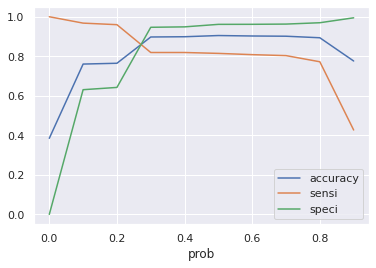

In [144]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Analysis of the above curve
***Accuracy*** - Becomes stable after 0.35

***Sensitivity*** - Decreases with the increased probablity.

***Specificity*** - Increases with the increasing probablity.

***At point 0.35*** where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

So, 0.35 may be the optimal cutoff.

##### Predicted value with 0.35 probablity cutoff

In [145]:
# Creating a column with name "predicted", which is the predicted value for 0.35 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,1,0.9997,2670,1,1,1,1,1,1,1,1,1,1,1
1,0,0.0116,8935,1,0,0,0,0,0,0,0,0,0,0
2,0,0.0472,8826,1,0,0,0,0,0,0,0,0,0,0
3,1,0.8846,4641,1,1,1,1,1,1,1,1,1,0,1
4,1,0.9997,8098,1,1,1,1,1,1,1,1,1,1,1


### Creating Lead Score
Creating a column called `Lead Score` by multplying the converted probablity with 100.

Lead Score = (Converted_Prob) X 100

In [146]:
# Creating Lead Score column
y_train_pred_final['Lead Score'] = round((y_train_pred_final['Converted_Prob']*100))
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
0,1,0.9997,2670,1,1,1,1,1,1,1,1,1,1,1,100.0000
1,0,0.0116,8935,1,0,0,0,0,0,0,0,0,0,0,1.0000
2,0,0.0472,8826,1,0,0,0,0,0,0,0,0,0,0,5.0000
3,1,0.8846,4641,1,1,1,1,1,1,1,1,1,0,1,88.0000
4,1,0.9997,8098,1,1,1,1,1,1,1,1,1,1,1,100.0000


The customers with Lead Score more than 35 will be converted as we decided to have the optimal probablity cutoff is 0.35.

Higher the Lead Score, higher the chance of the customers to be converted. 

#### Finding the average Lead Score of the predicted converted leads

In [147]:
# Creating dataframe for predicted converted leads
y_train_pred_converted = y_train_pred_final[y_train_pred_final['predicted']==1]
y_train_pred_converted.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
0,1,0.9997,2670,1,1,1,1,1,1,1,1,1,1,1,100.0000
3,1,0.8846,4641,1,1,1,1,1,1,1,1,1,0,1,88.0000
4,1,0.9997,8098,1,1,1,1,1,1,1,1,1,1,1,100.0000
12,1,0.9909,5206,1,1,1,1,1,1,1,1,1,1,1,99.0000
13,1,0.8846,559,1,1,1,1,1,1,1,1,1,0,1,88.0000


In [148]:
# Average Lead Score of the predicted converted leads
avg_converted = round(sum(y_train_pred_converted['Lead Score'])/len(y_train_pred_converted.index))
avg_converted

89

We can see that the average Lead Score of the customers, who were `converted` is `90`.

#### Finding the average Lead Score of the predicted not converted leads

In [149]:
# Creating dataframe for predicted not converted leads
y_train_pred_not_converted = y_train_pred_final[y_train_pred_final['predicted']==0]
y_train_pred_not_converted.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
1,0,0.0116,8935,1,0,0,0,0,0,0,0,0,0,0,1.0000
2,0,0.0472,8826,1,0,0,0,0,0,0,0,0,0,0,5.0000
5,0,0.0308,8543,1,0,0,0,0,0,0,0,0,0,0,3.0000
6,0,0.0022,153,1,0,0,0,0,0,0,0,0,0,0,0.0000
7,0,0.0022,1045,1,0,0,0,0,0,0,0,0,0,0,0.0000


In [150]:
# Average Lead Score of the predicted not converted leads
avg_not_converted = round(sum(y_train_pred_not_converted['Lead Score'])/len(y_train_pred_not_converted.index))
avg_not_converted

11

We can see that the average Lead Score of the customers, who were `not converted` is `13`.

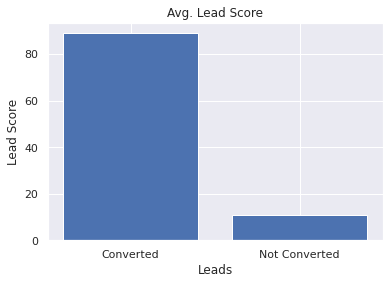

In [151]:
# Bar plot
plt.bar(['Converted', 'Not Converted'], [avg_converted, avg_not_converted])
plt.xlabel('Leads')
plt.ylabel('Lead Score')
plt.title('Avg. Lead Score')
plt.show()


## <a id="32"> Step 6: Accuracy and Confusion Matrix</a>


##### Confusion matrix

In [152]:
# Importing metrics library
from sklearn import metrics

In [153]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion)

[[4037  220]
 [ 482 2183]]


#### Accuracy

In [154]:
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.8985842242126553

So using the confusion matrix, we got an accuracy of about 89%, which seems to be a good number.

### Sensitivity & Specificity

In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity (Number of correctly predicted YES)

In [156]:
# Let's see the sensitivity
TP / float(TP+FN)

0.8191369606003752

#### Specificity (Number of correctly predicted NOs)

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.9483204134366925

#### False postive rate

In [158]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.05167958656330749


#### Positive predictive value 

In [159]:
# positive predictive value 
print (TP / float(TP+FP))

0.9084477736163129


#### Negative predictive value

In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8933392343438814


#### Analysis

So our model seems to have **`Good accuracy (~89%)`, `Good specificity (~95%)` and `Good sensitivity (~79%)`**.

### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [161]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [162]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'], drop_intermediate = False )

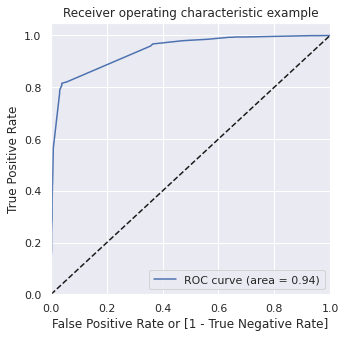

In [163]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

#### Gini of the model
We can see from the ROC curve, that the area of the curve is 0.92, which is the Gini of the model.

The curve is hugging the true positive rate axis.

## Testing the model

#### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [164]:
y_test=dataset_test.pop('Converted')
X_test=dataset_test

In [165]:
# Taking only the columns, which are selected in the train set
X_test = X_test[col]
X_test.head()

,Tags_Will revert after reading the email,What is your current occupation_Working Professional,Lead Origin_Lead Add Form,Last Notable Activity_SMS Sent,Lead Profile_UNKNOWN,Tags_Closed by Horizzon,Last Activity_Olark Chat Conversation,Lead Source_Welingak Website,Tags_Lost to EINS,Last Notable Activity_Had a Phone Conversation,Tags_Not doing further education,Last Activity_Email Bounced,Tags_Busy,Lead Profile_Student of SomeSchool
5950,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4321,1,0,0,0,1,0,0,0,0,0,0,0,0,0
6091,1,0,0,0,1,0,0,0,0,0,0,0,0,0
7308,0,0,0,1,1,0,0,0,0,0,0,0,0,0
8889,1,0,0,1,0,0,0,0,0,0,0,0,0,0


#### Statsmodel for the test set with the final model log_model_2

In [166]:
# Add constant
X_test_sm = sm.add_constant(X_test)

In [167]:
# Predictions on the test set with the final model log_model_2
y_test_pred = log_model_3.predict(X_test_sm)

In [168]:
y_test_pred.head()

5950   0.0022
4321   0.2574
6091   0.2574
7308   0.0308
8889   0.9909
dtype: float64

In [169]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5950,0.0022
4321,0.2574
6091,0.2574
7308,0.0308
8889,0.9909


In [170]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
5950,0
4321,0
6091,0
7308,0
8889,1


In [171]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [172]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [173]:
# Appending y_pred_1 and y_test_df
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [174]:
y_pred_final.head()

,Converted,CustID,0
0,0,5950,0.0022
1,0,4321,0.2574
2,0,6091,0.2574
3,0,7308,0.0308
4,1,8889,0.9909


In [175]:
# Renaming the '0' column as Converted probablity
y_pred_final = y_pred_final.rename(columns={0:'Converted_Prob'})

In [176]:
# Rearranging the columns 
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_Prob'], axis =1)

In [177]:
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,5950,0,0.0022
1,4321,0,0.2574
2,6091,0,0.2574
3,7308,0,0.0308
4,8889,1,0.9909


###### In the test set using 0.35 probablity cutoff, what we got in the train set 

In [178]:
y_pred_final['test_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)

In [179]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,test_predicted
0,5950,0,0.0022,0
1,4321,0,0.2574,0
2,6091,0,0.2574,0
3,7308,0,0.0308,0
4,8889,1,0.9909,1


#### Assigning Lead Score

In [180]:
# Creating Lead Score column
y_pred_final['Lead Score'] = round((y_pred_final['Converted_Prob']*100))
y_pred_final.head()

,CustID,Converted,Converted_Prob,test_predicted,Lead Score
0,5950,0,0.0022,0,0.0000
1,4321,0,0.2574,0,26.0000
2,6091,0,0.2574,0,26.0000
3,7308,0,0.0308,0,3.0000
4,8889,1,0.9909,1,99.0000


The customers with Lead Score more than 35 will be converted as the probablity cutoff is 0.35.

Higher the Lead Score, higher the chance of the customers to be converted.

#### Confusion matrix

In [181]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['test_predicted'])
confusion2

array([[1348,   67],
       [ 162,  731]])

In [182]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Accuracy

In [183]:
# Let's check the overall accuracy of the test set
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['test_predicted'])

0.9007798960138648

#### Sensitivity

In [184]:
# Sensitivity of the test set
TP / float(TP+FN)

0.8185890257558791

#### Specificity

In [185]:
# Specificity for the test set
TN / float(TN+FP)

0.9526501766784452

## <a id="32"> Step 7: Conclusion </a>


- Train set
    - **Accuracy = 0.89**
    - **Sensitivity = 0.79**
    - **Specificity = 0.95**
- Test set
    - **Accuracy = 0.89**
    - **Sensitivity = 0.79**
    - **Specificity = 0.96**

Overall, the model is performing well in the test set, what it had learnt from the train set.